<a href="https://colab.research.google.com/github/Jamaleldin/MRNET-for-Knee-Diagnosis/blob/Model_inception/inception_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Needed Imports for the Inception Module

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers
import numpy as np

# Functions to create Inception Blocks

## There is five different kinds of blocks

In [0]:
# 1x1 convolution layers used for dimensionality reduction before applying layers
def inception_block1(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out, name):
  branch1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in) #depth=64,64,64

  branch2 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in) #depth=48,48,48
  branch2 = Conv2D(f2_out, (5,5), padding='same', activation='relu')(branch2) #depth=64,64,64

  branch3 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in) #depth=64,64,64
  branch3 = Conv2D(f3_out, (3,3), padding='same', activation='relu')(branch3) #depth=96,96,96
  branch3 = Conv2D(f3_out, (3,3), padding='same', activation='relu')(branch3) #depth=96,96,96
 	# avg pooling layer performs down-sampling by dividing the input into rectangular pooling regions and computing the average values of each region.
  branch4 = AveragePooling2D((3,3), strides=(1,1), padding='same')(layer_in)
  branch4 = Conv2D(f4_out, (1,1), padding='same', activation='relu')(branch4) #depth=32,64,64
	# concatenate filters
  layer_out = concatenate([branch1, branch2, branch3, branch4], axis=3, name=name)
  return layer_out

In [0]:
# 1x1 convolution layers used for dimensionality reduction before applying layers
def inception_block2(layer_in, f1, f2_in, f2_out, name):
  branch1 = Conv2D(f1, (3,3), padding='valid', strides=(2, 2), activation='relu')(layer_in) #depth=384

  branch2 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in) #depth=64
  branch2 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(branch2) #depth=96
  branch2 = Conv2D(f2_out, (3,3), padding='valid', strides=(2, 2), activation='relu')(branch2) #depth=96
 	# max pooling used to provide more options to the inception layer
  branch3 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(layer_in)
	# concatenate filters
  layer_out = concatenate([branch1, branch2, branch3], axis=3, name=name)
  return layer_out

In [0]:
# 1x1 convolution layers used for dimensionality reduction before applying layers
def inception_block3(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out, name):
  branch1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in) #depth=192,192,192,192

  branch2 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in) #depth=128,160,160,192
  branch2 = Conv2D(f2_in, (1,7), padding='same', activation='relu')(branch2) #depth=128,160,160,192
  branch2 = Conv2D(f2_out, (7,1), padding='same', activation='relu')(branch2) #depth=192,192,192,192

  branch3 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in) #depth=128,160,160,192
  branch3 = Conv2D(f3_in, (7,1), padding='same', activation='relu')(branch3) #depth=128,160,160,192
  branch3 = Conv2D(f3_in, (1,7), padding='same', activation='relu')(branch3) #depth=128,160,160,192
  branch3 = Conv2D(f3_in, (7,1), padding='same', activation='relu')(branch3) #depth=128,160,160,192
  branch3 = Conv2D(f3_out, (1,7), padding='same', activation='relu')(branch3) #depth=192,192,192,192
 	# avg pooling layer performs down-sampling by dividing the input into rectangular pooling regions and computing the average values of each region.
  branch4 = AveragePooling2D((3,3), strides=(1,1), padding='same')(layer_in)
  branch4 = Conv2D(f4_out, (1,1), padding='same', activation='relu')(branch4) #depth=192,192,192,192
	# concatenate filters
  layer_out = concatenate([branch1, branch2, branch3, branch4], axis=3, name=name)
  return layer_out

In [0]:
# 1x1 convolution layers used for dimensionality reduction before applying layers
def inception_block4(layer_in, f1_in, f1_out, f2, name):
  branch1 = Conv2D(f1_in, (1,1), padding='same', activation='relu')(layer_in) #depth=192
  branch1 = Conv2D(f1_out, (3,3), padding='valid', strides=(2, 2), activation='relu')(branch1) #depth=320

  branch2 = Conv2D(f2, (1,1), padding='same', activation='relu')(layer_in) #depth=192
  branch2 = Conv2D(f2, (1,7), padding='same', activation='relu')(branch2) #depth=192
  branch2 = Conv2D(f2, (7,1), padding='same', activation='relu')(branch2) #depth=192
  branch2 = Conv2D(f2, (3,3), padding='valid', strides=(2, 2), activation='relu')(branch2) #depth=192
 	# max pooling used to provide more options to the inception layer
  branch3 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(layer_in)
	# concatenate filters
  layer_out = concatenate([branch1, branch2, branch3], axis=3, name=name)
  return layer_out

In [0]:
# 1x1 convolution layers used for dimensionality reduction before applying layers
def inception_block5(layer_in, f1, f2, f3_in, f3_out, f4_out, name):
  branch1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in) #depth=320

  branch2 = Conv2D(f2, (1,1), padding='same', activation='relu')(layer_in) #depth=384
  branch2 = concatenate([Conv2D(f2, (1,3), padding='same', activation='relu')(branch2),
	                       Conv2D(f2, (3,1), padding='same', activation='relu')(branch2)], axis=3)

  branch3 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in) #depth=448
  branch3 = Conv2D(f3_out, (3,3), padding='same', activation='relu')(branch3) #depth=384
  branch3 = concatenate([Conv2D(f3_out, (1,3), padding='same', activation='relu')(branch3),
	                       Conv2D(f3_out, (3,1), padding='same', activation='relu')(branch3)], axis=3)
 	# avg pooling layer performs down-sampling by dividing the input into rectangular pooling regions and computing the average values of each region.
  branch4 = AveragePooling2D((3,3), strides=(1,1), padding='same')(layer_in)
  branch4 = Conv2D(f4_out, (1,1), padding='same', activation='relu')(branch4) #depth=192
	# concatenate filters
  layer_out = concatenate([branch1, branch2, branch3, branch4], axis=3, name=name)
  return layer_out

# Creating the Module

In [0]:
# the first layers in the inception module
input_layer = Input(shape=(256, 256, 3))

x = Conv2D(32, (3, 3), padding='same', strides=(2, 2), activation='relu', name='conv_1_3x3/2')(input_layer)

x = Conv2D(32, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2_3x3/1')(x)
x = Conv2D(64, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_3_3x3/1')(x)
# Max pooling selects the maximum element from the region of the feature map covered by the filter. 
# Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.
x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(80, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_4_1x1/1')(x)

x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_5_3x3/1')(x)
x = MaxPooling2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

In [0]:
# starting to put the inception layers (11 blocks)
x = inception_block1(x, 64, 48, 64, 64, 96, 32, 'blck1_1')
x = inception_block1(x, 64, 48, 64, 64, 96, 64, 'block1_2')
x = inception_block1(x, 64, 48, 64, 64, 96, 64, 'block1_3')

x = inception_block2(x, 384, 64, 96, 'block2')

x = inception_block3(x, 192, 128, 192, 128, 192, 192, 'block3_1')
x = inception_block3(x, 192, 160, 192, 160, 192, 192, 'block3_2')
x = inception_block3(x, 192, 160, 192, 160, 192, 192, 'block3_3')
x = inception_block3(x, 192, 192, 192, 192, 192, 192, 'block3_4')

In [0]:
# auxiliary logits branch to overcome the vanishing gradient problem
x1 = AveragePooling2D((5, 5), padding='valid', strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Conv2D(768, (min(x1.shape[1],5), min(x1.shape[2],5)), padding='valid', activation='relu')(x1)
# flatten takes the output of the previous layers, “flattens” them and turns them into a single vector that can be an input for the next stage.#
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dense(1, activation='sigmoid', name='auxilliary_output_1')(x1)

In [0]:
x = inception_block4(x, 192, 320, 192, name='block4')
# last two inception layers
x = inception_block5(x, 320, 384, 448, 384, 192, 'block5_1')
x = inception_block5(x, 320, 384, 448, 384, 192, 'block5_2')
x = AveragePooling2D((min(x.shape[1],7), min(x.shape[2],7)), padding='valid')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1, activation='sigmoid', name='output_prediction')(x)

In [20]:
# create model
model2 = Model(inputs=input_layer, outputs=x)
# summarize model
model2.summary()
# plot model architecture
plot_model(model2, show_shapes=True, to_file='inception_module.png')
model2.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(1e-5), metrics=['acc'])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

In [12]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [13]:
%cd '/content/drive/My Drive/Colab Notebooks'
!pip install import-ipynb

/content/drive/My Drive/Colab Notebooks
  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp36-none-any.whl size=2976 sha256=82de2a1586f3cbb631f7b748a41886aacc88beeb46bc0f4ae34bc8e1591ab380
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb


In [14]:
import import_ipynb
import MRNet_models_processing as processing

importing Jupyter notebook from MRNet_models_processing.ipynb


Using TensorFlow backend.


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Archive:  /content/drive/My Drive/MRNET data set/MRNet-v1.0.zip
warning [/content/drive/My Drive/MRNET data set/MRNet-v1.0.zip]:  4294967296 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  4294967296
  (attempting to re-compensate)
replace /content/drive/My Drive/MRNET data set/MRNet-v1.0/valid-abnormal.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
file #2547:  bad zipfile offset (local header sig):  1353202
  (attempting to re-compensate)


Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.5047 - acc: 0.7994
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/Inception V3/Extractor/sagittal_abnormal.h5
51/51 [==============================] - 21s 407ms/step - loss: 0.5047 - acc: 0.7994 - val_loss: 0.4952 - val_acc: 0.8053
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.4863 - acc: 0.8083
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 16s 319ms/step - loss: 0.4863 - acc: 0.8083 - val_loss: 0.5031 - val_acc: 0.8053
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.4787 - acc: 0.8083
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 16s 305ms/step - loss: 0.4787 - acc: 0.8083 - val_loss: 0.4980 - val_acc: 0.8053
Epoch 4/50
51/51 [==============================] - ETA: 0s - loss: 0.4781 - acc: 0.8083
Epoch 00004: val_acc did not improv

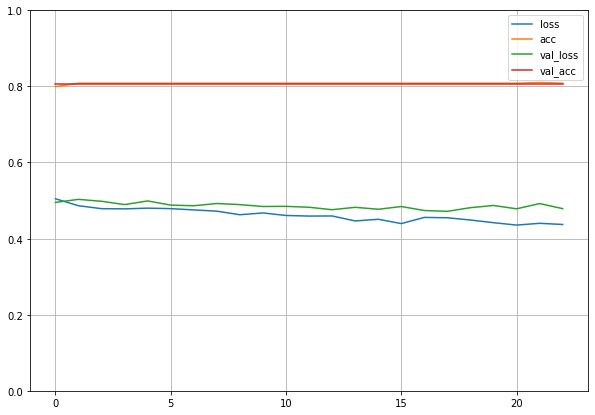

In [21]:
processing.train_extractor(model2, processing.inception, processing.sagittal, processing.abnormal)

In [0]:
processing.train_extractor(model2, processing.inception, processing.sagittal, processing.acl)

In [0]:
processing.train_extractor(model2, processing.inception, processing.sagittal, processing.meniscal)

In [0]:
processing.train_extractor(model2, processing.inception, processing.axial, processing.abnormal)

In [0]:
processing.train_extractor(model2, processing.inception, processing.axial, processing.acl)

In [0]:
processing.train_extractor(model2, processing.inception, processing.axial, processing.meniscal)

In [0]:
processing.train_extractor(model2, processing.inception, processing.coronal, processing.abnormal)

In [0]:
processing.train_extractor(model2, processing.inception, processing.coronal, processing.acl)

In [0]:
processing.train_extractor(model2, processing.inception, processing.coronal, processing.meniscal)

In [0]:
#loading model to train classifier
loaded_sagittal_abnormal = processing.load_model(processing.inception, processing.sagittal, processing.abnormal, processing.extractor)

In [26]:
extractor_saggittal_abnormal = Model(inputs=loaded_sagittal_abnormal.input, outputs=loaded_sagittal_abnormal.get_layer('block5_2').output)
extractor_saggittal_abnormal.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv_1_3x3/2 (Conv2D)           (None, 128, 128, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
conv_2_3x3/1 (Conv2D)           (None, 128, 128, 32) 9248        conv_1_3x3/2[0][0]               
__________________________________________________________________________________________________
conv_3_3x3/1 (Conv2D)           (None, 128, 128, 64) 18496       conv_2_3x3/1[0][0]               
____________________________________________________________________________________________

In [0]:
#making classifier
classifier_model_saggittal_abnormal = tf.keras.Sequential()
classifier_model_saggittal_abnormal.add(Dense(1024, activation='relu', input_dim=2048))
classifier_model_saggittal_abnormal.add(Dense(1, activation='sigmoid'))
classifier_model_saggittal_abnormal.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(1e-5), metrics=['acc'])

Epoch 1/50
50/51 [============================>.] - ETA: 0s - loss: 0.5315 - acc: 0.7980
Epoch 00001: val_acc improved from -inf to 0.80531, saving model to /content/drive/My Drive/Models/Inception V3/Classifier/sagittal_abnormal.h5
51/51 [==============================] - 0s 10ms/step - loss: 0.5304 - acc: 0.7984 - val_loss: 0.4897 - val_acc: 0.8053
Epoch 2/50
35/51 [===================>..........] - ETA: 0s - loss: 0.4875 - acc: 0.8071
Epoch 00002: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 4ms/step - loss: 0.4858 - acc: 0.8083 - val_loss: 0.4894 - val_acc: 0.8053
Epoch 3/50
36/51 [====================>.........] - ETA: 0s - loss: 0.4725 - acc: 0.8181
Epoch 00003: val_acc did not improve from 0.80531
51/51 [==============================] - 0s 4ms/step - loss: 0.4858 - acc: 0.8083 - val_loss: 0.4895 - val_acc: 0.8053
Epoch 4/50
34/51 [===================>..........] - ETA: 0s - loss: 0.4774 - acc: 0.8147
Epoch 00004: val_acc did not improve from 

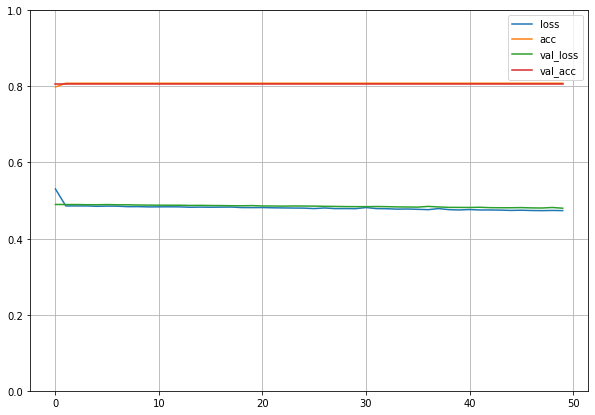

In [31]:
#train classifire
processing.train_classifier(extractor_saggittal_abnormal, classifier_model_saggittal_abnormal, processing.inception, processing.sagittal, processing.abnormal)